# Travel Planner Based on Currency Conversion Risk

**Project Goal:** Create a travel planning tool that will allow the user to select a set of countries they would like to travel to and a travel timeframe (3,6,12 months). The tool will analyze historical Forex data and predict the country that will have the most favorable currency within the given travel timeframe.

**The tool will:** Check Forex volatility as barometer for travel decisions Use historical forex data (up to 2 years) 3 - 6 - 12 months predictive outlook using Monte Carlo and other algorithms Produce graphs, risk graphs, value graphs, Variables - currency / country, traveling times (3-6-12 months)


### Import Library

In [ ]:
import os
import requests
import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data as wb
import seaborn as sns

from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo

from yahoofinancials import YahooFinancials

import plotly.express as px
from pathlib import Path
#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

from MCForecastTools import MCSimulation

In [ ]:
# Load .env enviroment variables
load_dotenv()

# Set up API credentials

# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")


# Set the Mapbox API key
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)
# Verify that Mapbox API key was correctly loaded
print(f"Mapbox Key type: {type(map_box_api)}")

In [ ]:
# put all inputs required for the project up here to be called at once.

print("Lets Start our Travel Planning!" "\n"
     " Please input 3 countries you are interested in traveling to," "\n"
      " followed by your budgeted amount and projected time of travel." "\n" )
print()
name = (input("What Country are you interested in traveling to? "))
name_2 = (input("What Country are you interested in traveling to? "))
name_3 = (input("What Country are you interested in traveling to? "))
amount = int(input("Enter the Amount: "))
number_of_months = int(input("In how many months will you be traveling?"))



### Country 1

In [ ]:
# Get user input for first country and return basic country data

name = name
#name = (input("What Country are you interested in traveling to? "))
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")

country_info




### Country 2

In [25]:
# Get user input for the second country and return basic country data

name_2 = name_2
# name_2 = (input("What Country are you interested in traveling to? "))
country_name_2 = CountryInfo(name_2).name()
country_border_2= CountryInfo(name_2).borders()
country_capital_2= CountryInfo(name_2).capital()
country_currency_2 = CountryInfo(name_2).currencies()
country_timezone_2 = CountryInfo(name_2).timezones()
country_wiki_2 = CountryInfo(name_2).wiki()
country_info_2 = print(f"Country name: {country_name_2}", '\n'
                      f"Country Capital: {country_capital_2}", '\n'
                      f"Country Border: {country_border_2}", '\n' 
                      f"Country Currency: {country_currency_2}", '\n' 
                      f"Country Timezone: {country_timezone_2}", '\n'
                      f"Country Wiki: {country_wiki_2}")

country_info_2

Country name: turkey 
Country Capital: Ankara 
Country Border: ['ARM', 'AZE', 'BGR', 'GEO', 'GRC', 'IRN', 'IRQ', 'SYR'] 
Country Currency: ['TRY'] 
Country Timezone: ['UTC+02:00'] 
Country Wiki: http://en.wikipedia.org/wiki/turkey


### Country 3

In [26]:
# Get user input for the third country and return basic country data

name_3 = name_3
# name_3 = (input("What Country are you interested in traveling to? "))
country_name_3 = CountryInfo(name_3).name()
country_border_3= CountryInfo(name_3).borders()
country_capital_3= CountryInfo(name_3).capital()
country_currency_3 = CountryInfo(name_3).currencies()
country_timezone_3 = CountryInfo(name_3).timezones()
country_wiki_3 = CountryInfo(name_3).wiki()
country_info_3 = print(f"Country name: {country_name_3}", '\n'
                      f"Country Capital: {country_capital_3}", '\n'
                      f"Country Border: {country_border_3}", '\n' 
                      f"Country Currency: {country_currency_3}", '\n' 
                      f"Country Timezone: {country_timezone_3}", '\n'
                      f"Country Wiki: {country_wiki_3}")

country_info_3

Country name: mexico 
Country Capital: Mexico City 
Country Border: ['BLZ', 'GTM', 'USA'] 
Country Currency: ['MXN'] 
Country Timezone: ['UTC−08:00', 'UTC−07:00', 'UTC−06:00'] 
Country Wiki: http://en.wikipedia.org/wiki/mexico


In [27]:
#country Currency 1
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"

#Country Currency 2
pair_2 = country_currency_2[0].strip("''")
forex_pair_2 = pair_2 + "USD"

#Country Currency 3
pair_3 = country_currency_3[0].strip("''")
forex_pair_3 = pair_3 + "USD"

print(f' We will now analyze the following pairs: \n {forex_pair} \n {forex_pair_2} \n {forex_pair_3}')

 We will now analyze the following pairs: 
 CNYUSD 
 TRYUSD 
 MXNUSD


In [28]:
# Currency 1
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
Forex = forex

# Currency 2
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_2, api_key='alpha_vantage_api_key')
forex_2 = time_series_2.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
Forex_2 = forex_2

# Currency 3
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_3, api_key='alpha_vantage_api_key')
forex_3 = time_series_3.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
Forex_3 = forex_3

In [29]:
# Currency 1
forex_close = Forex.drop(columns=['volume', 'open', 'high', 'low'])

# Currency 2
forex_2_close = Forex_2.drop(columns=['volume', 'open', 'high', 'low'])

# Currency 3
forex_3_close = Forex_3.drop(columns=['volume', 'open', 'high', 'low'])

# Concat all 3 countries currency
joined_forex = pd.concat([forex_close, forex_2_close, forex_3_close], axis="columns", join="inner", keys=[f'{forex_pair}',f'{forex_pair_2}',f'{forex_pair_3}'])

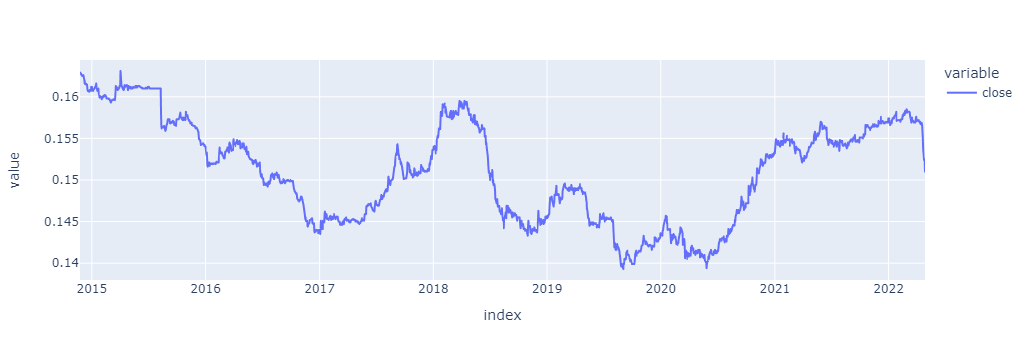

In [30]:
# Plot The Closing Value 
forex[['close']].plot()

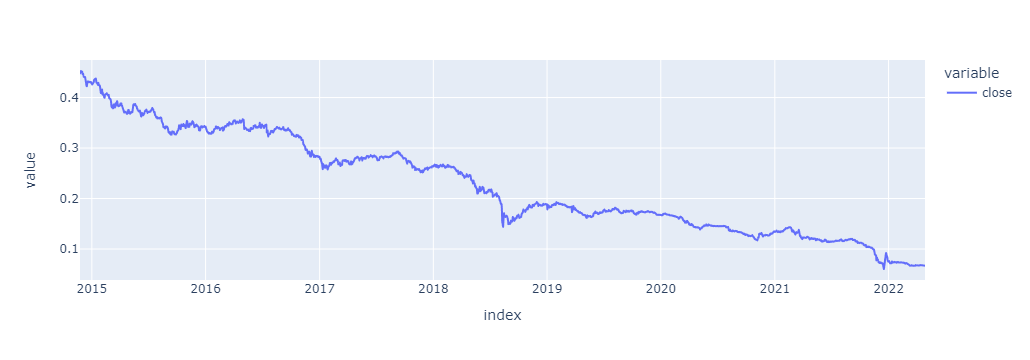

In [31]:
# Plot The Closing Value Of Country Currency 2
forex_2[['close']].plot()

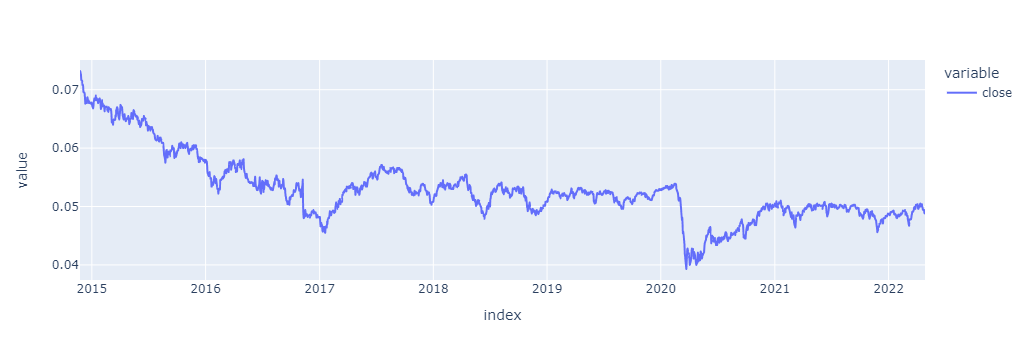

In [32]:
# Plot The Closing Value Of Country Currency 3
forex_3[['close']].plot()

In [33]:
forex_stats = forex.describe()
forex_stats

open         high          low        close  volume
count  1938.000000  1938.000000  1938.000000  1938.000000  1938.0
mean      0.150989     0.151200     0.150763     0.150978     0.0
std       0.006089     0.006089     0.006091     0.006087     0.0
min       0.139400     0.139400     0.139100     0.139300     0.0
25%       0.145325     0.145500     0.145200     0.145325     0.0
50%       0.151200     0.151400     0.150900     0.151150     0.0
75%       0.156300     0.156500     0.156100     0.156300     0.0
max       0.163200     0.163200     0.162700     0.163100     0.0

In [34]:
forex_stats_2 = forex_2.describe()
forex_stats_2

open         high          low        close  volume
count  1938.000000  1938.000000  1938.000000  1938.000000  1938.0
mean      0.227676     0.228909     0.226129     0.227516     0.0
std       0.098012     0.098341     0.097573     0.097939     0.0
min       0.059700     0.063400     0.054000     0.060400     0.0
25%       0.145200     0.145400     0.144900     0.145200     0.0
50%       0.192350     0.193300     0.190550     0.191450     0.0
75%       0.326975     0.328875     0.325375     0.326500     0.0
max       0.452600     0.452900     0.450400     0.452600     0.0

In [35]:
forex_stats_3 = forex_3.describe()
forex_stats_3

open         high          low        close  volume
count  1939.000000  1939.000000  1939.000000  1939.000000  1939.0
mean      0.052888     0.053209     0.052459     0.052873     0.0
std       0.005662     0.005639     0.005559     0.005625     0.0
min       0.039300     0.040500     0.038700     0.039300     0.0
25%       0.049500     0.049800     0.049200     0.049500     0.0
50%       0.052200     0.052500     0.051900     0.052200     0.0
75%       0.054600     0.054900     0.053900     0.054500     0.0
max       0.073400     0.073500     0.073100     0.073200     0.0

# Plot the Candlestick charts

### Plot The First Countries Currency On A Candlestick Chart Verse The US Dollar

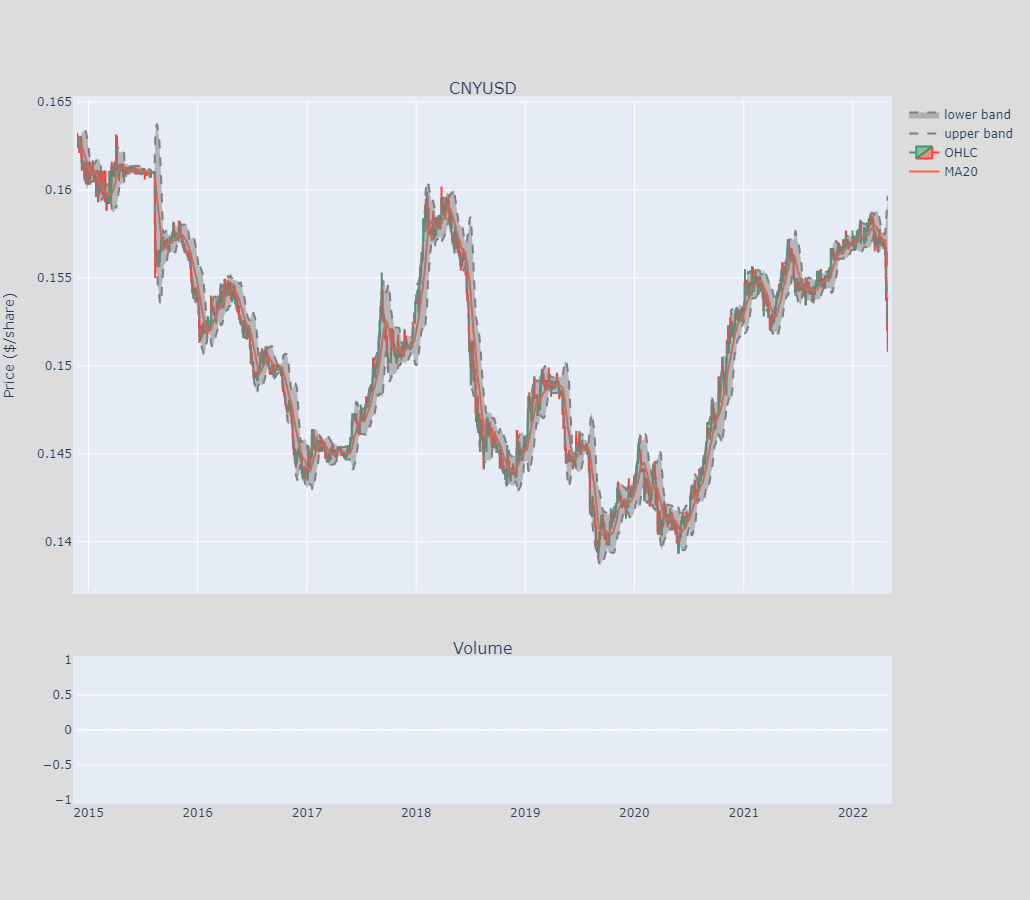

In [36]:
# Set moving Average and STD
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
forex['std'] = forex['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] + (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] - (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='gainsboro'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

### Plot The Second Countries Currency On A Candlestick Chart Verse The US Dollar

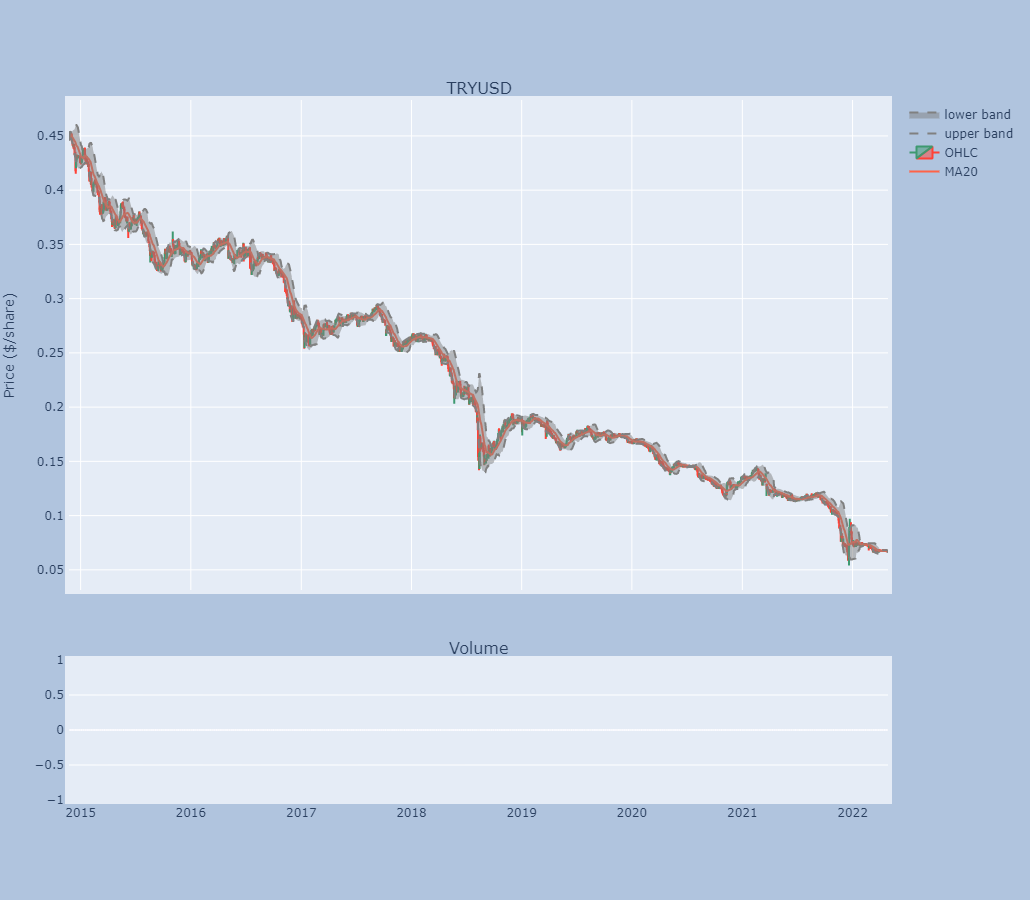

In [37]:
# Country Currency 2

# Set moving Average and STD
forex_2['MA20'] = forex_2['close'].rolling(window=20, min_periods=0).mean()
forex_2['std'] = forex_2['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_2, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex_2.index, y=forex_2['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex_2.index, y=forex_2["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex_2.index, open=forex_2["open"], high=forex_2["high"],
                low=forex_2["low"], close=forex_2["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex_2.index, 
                         y=forex_2["MA20"] + (forex_2['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex_2.index, 
                         y=forex_2["MA20"] - (forex_2['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()



### Plot The Third Countries Currency On A Candlestick Chart Verse The US Dollar

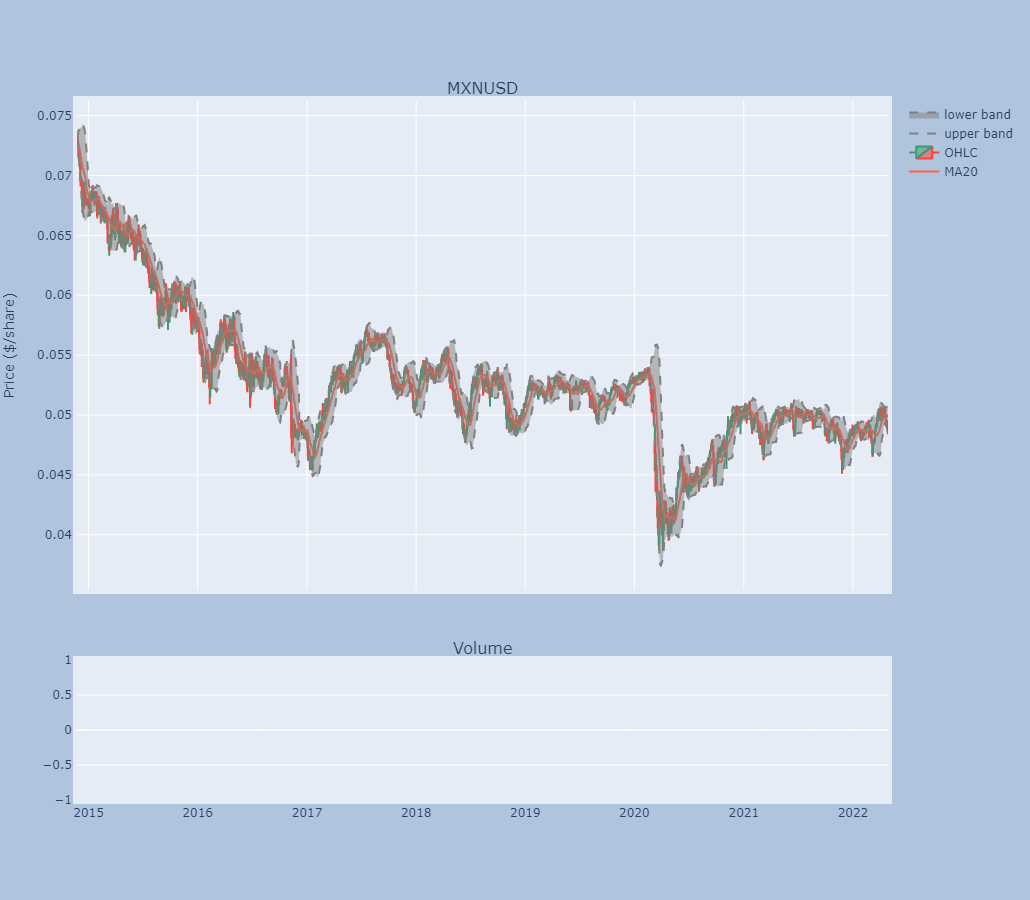

In [38]:
# Country Currency 3

# Set moving Average and STD
forex_3['MA20'] = forex_3['close'].rolling(window=20, min_periods=0).mean()
forex_3['std'] = forex_3['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_3, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex_3.index, y=forex_3['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex_3.index, y=forex_3["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex_3.index, open=forex_3["open"], high=forex_3["high"],
                low=forex_3["low"], close=forex_3["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex_3.index, 
                         y=forex_3["MA20"] + (forex_3['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex_3.index, 
                         y=forex_3["MA20"] - (forex_3['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

# Foreign Exchange Currency Converter

In [39]:
# Only input the amount of currency to be converted. 

currency, amount = CurrencyRates(), amount #int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

USD To CNY 1500
Conversion Amount:  9925.751072961375


In [40]:
# Country 2 currency conversion

currency, amount = CurrencyRates(), amount
from_currency, to_currency = "USD", pair_2.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

USD To TRY 1500
Conversion Amount:  22226.323319027182


In [41]:
# country 3 currency conversion

currency, amount = CurrencyRates(), amount
from_currency, to_currency = "USD", pair_3.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

USD To MXN 1500
Conversion Amount:  30691.13018597997


# Monte Carlo Simulation on the returns of your inputed currency

### Plot the Simulated Outcomes for the inputed amount of days trajectory for the currency of country 1


### Country Currency 1 Monte Carlo 

In [42]:
# time_series = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair}', api_key='alpha_vantage_api_key')
# forex = time_series.read()
# forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
ticker_data = pd.concat([forex], axis=1, keys=[f'{forex_pair}'])
# number_of_months = int(input("Input Number Of Months"))
number_of_months = number_of_months

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 1000,
    num_trading_days = 21 * number_of_months
)

In [43]:
# Run Monte Carlo simulations to forecast one year daily returns
forex_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.996284  0.999945  1.004083  1.002142  0.996861  1.004762  1.001412   
2    0.991205  1.000675  0.999669  1.003137  0.997026  1.005418  1.000041   
3    0.991066  1.002537  1.003416  1.001878  0.998608  1.007531  1.003143   
4    0.989336  1.000781  1.002981  0.999701  0.995769  1.005351  1.001297   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.964019  0.990214  1.005755  0.983079  0.985923  0.962153  0.990849   
249  0.964695  0.989982  1.007584  0.981745  0.983386  0.955935  0.991959   
250  0.961975  0.991550  1.010286  0.977967  0.983994  0.955225  0.991809   
251  0.959813  0.991391  1.009149  0.976932  0.985985  0.951329  0.992570   
252  0.959563  0.994014  1.006256  0.976825  0.985795  0.951564  0.994051   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.997684  0.998549  1.001657  ...  1.000832  1.001273  0.998625   
2    0.996016  0.996153  1.000957  ...  0.998695  1.004239  0.998482   
3    0.997113  0.988973  1.001519  ...  0.996646  1.004633  0.995349   
4    0.998619  0.988201  1.000516  ...  0.995800  1.003979  0.991896   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.019774  0.973165  0.993678  ...  1.028608  0.944718  1.007580   
249  1.020056  0.970717  0.991410  ...  1.029737  0.946326  1.009630   
250  1.020035  0.969392  0.991651  ...  1.029297  0.945533  1.010813   
251  1.015337  0.971933  0.991635  ...  1.028134  0.946748  1.010518   
252  1.017430  0.976189  0.993993  ...  1.030983  0.942543  1.007118   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.997580  1.000018  1.000557  1.000426  0.995678  1.000977  1.001279  
2    0.997976  1.000305  0.997088  0.999373  0.994144  0.999723  0.997560  
3    0.995163  1.002948  1.001432  1.000829  0.991485  1.000576  0.999999  
4    0.993336  1.000113  1.002836  1.001786  0.986583  0.995244  1.001060  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.069774  0.989149  0.992522  0.962840  0.867224  0.972275  1.006499  
249  1.070272  0.990657  0.992529  0.961976  0.863991  0.972251  1.003421  
250  1.070136  0.990662  0.992691  0.960691  0.863870  0.970852  1.003828  
251  1.070181  0.986182  0.991794  0.957346  0.860909  0.969710  1.005035  
252  1.071786  0.984885  0.994735  0.958115  0.863843  0.967912  1.005963  

[253 rows x 1000 columns]

### Plot the Simulated Outcomes for the inputed amount of time

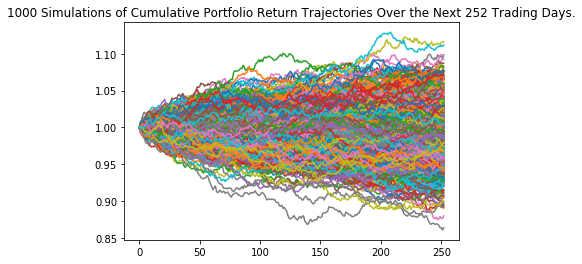

In [44]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot = forex_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for inputted countries currency over the Next Year (252 Trading Days)

In [45]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  0.999960  0.999978  0.991959  1.007306
2  0.999910  0.999929  0.989387  1.011208
3  0.999929  0.999915  0.987947  1.016999
4  0.999854  0.999905  0.985411  1.020546

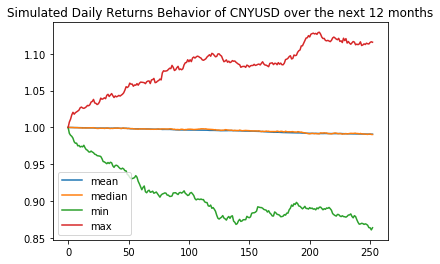

In [46]:
# Use the `plot` function to visually analyze the trajectory of first countries currency returns on a 252 trading day simulation
df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} over the next {number_of_months} months");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [47]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample dat
cumulative_pnl.head()

mean       median          min          max
0  1500.000000  1500.000000  1500.000000  1500.000000
1  1499.939716  1499.967367  1487.938922  1510.958405
2  1499.864406  1499.893689  1484.080982  1516.811631
3  1499.893021  1499.871966  1481.920283  1525.498098
4  1499.780449  1499.857689  1478.116868  1530.818504

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

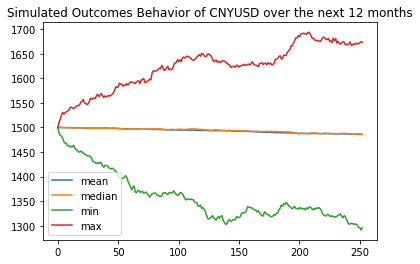

In [48]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} over the next {number_of_months} months");

### Calculate the range of the possible outcomes of our inputted amount in first countries currency

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = forex_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               0.990799
std                0.036901
min                0.863843
25%                0.967088
50%                0.990439
75%                1.013325
max                1.115672
95% CI Lower       0.919578
95% CI Upper       1.066956
Name: 252, dtype: float64


In [50]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower = round(tbl[8]*amount,2)
ci_upper = round(tbl[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1500 will end within the range of  $1379.37 and $1600.43, by the time of your projected vacation.


## Second Countries Currency - Monte Carlo

In [51]:
ticker_data_2 = pd.concat([forex_2], axis=1, keys=[f'{forex_pair_2}'])
number_of_months = number_of_months

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = 1000,
    num_trading_days = 21 * number_of_months
)

In [52]:
# Run Monte Carlo simulations to forecast one year daily returns
forex_2_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.009845  0.997552  0.985045  1.005641  0.998725  1.000253  0.998042   
2    0.989929  1.007998  0.994486  1.001853  1.001311  1.015249  1.003182   
3    1.012326  1.001031  0.988265  0.991529  0.997686  1.025333  1.014611   
4    1.004591  1.014341  0.972123  0.993278  0.989230  1.018723  1.007401   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.874750  1.165000  1.098154  1.136953  1.028401  0.693377  0.807193   
249  0.865704  1.164634  1.097182  1.127340  1.019187  0.680511  0.814160   
250  0.848314  1.176829  1.108295  1.111708  1.022526  0.681315  0.793394   
251  0.845699  1.174116  1.104729  1.107327  1.023625  0.693414  0.770817   
252  0.849314  1.166945  1.116838  1.114096  1.031730  0.682058  0.782096   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.016578  0.972152  1.012809  ...  1.020495  0.987423  1.005742   
2    1.019875  0.975285  0.994094  ...  1.034702  0.982343  1.008067   
3    1.026519  0.984196  0.984179  ...  1.019608  0.976659  1.009117   
4    1.023733  0.989916  0.968863  ...  1.030396  0.969298  0.981404   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.086642  0.972041  0.921528  ...  0.624437  0.678163  0.560344   
249  1.084455  0.963364  0.915297  ...  0.627848  0.679861  0.567673   
250  1.061441  0.976544  0.916938  ...  0.620006  0.680968  0.569261   
251  1.049441  0.989685  0.903298  ...  0.612074  0.681115  0.566384   
252  1.043138  0.985264  0.906637  ...  0.625978  0.677734  0.580403   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.982592  0.999294  1.009235  0.983671  1.006999  1.015011  0.991495  
2    0.982030  0.966444  0.993770  0.994959  1.020774  1.021850  1.024526  
3    0.978421  0.922611  0.979322  1.003176  1.002817  1.028923  1.023509  
4    0.988704  0.925472  0.966683  1.007309  0.979645  1.044070  1.026070  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.182404  1.041846  0.866396  0.970421  0.948901  0.679623  0.810901  
249  1.170317  1.054999  0.866252  0.972664  0.960646  0.689576  0.828747  
250  1.162878  1.061925  0.849516  0.980464  0.968018  0.693662  0.826847  
251  1.162896  1.064730  0.847580  0.982934  0.963751  0.691211  0.826978  
252  1.152178  1.055342  0.842199  0.985329  0.957759  0.701279  0.816762  

[253 rows x 1000 columns]

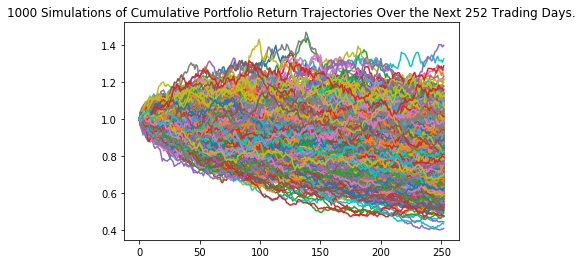

In [53]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot_2 = forex_2_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for the second countries currency

In [54]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)

# Display sample data
df_simulated_returns_2.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  0.999282  0.999497  0.958977  1.040094
2  0.997804  0.997415  0.934841  1.058708
3  0.996290  0.996669  0.913162  1.068137
4  0.995552  0.995520  0.916687  1.080591

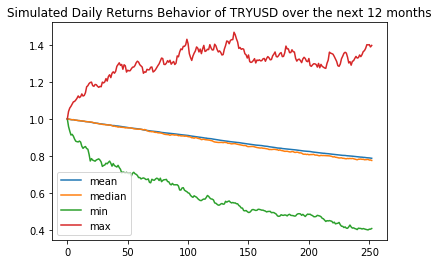

In [55]:
# Use the `plot` function to visually analyze the trajectory of first countries currency returns on a 252 trading day simulation
df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2} over the next {number_of_months} months");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [56]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl_2 = initial_investment * df_simulated_returns_2

# Display sample dat
cumulative_pnl_2.head()

mean       median          min          max
0  1500.000000  1500.000000  1500.000000  1500.000000
1  1498.923179  1499.244814  1438.465231  1560.140320
2  1496.706125  1496.122032  1402.261607  1588.061276
3  1494.435363  1495.003650  1369.742671  1602.204810
4  1493.328206  1493.280249  1375.031028  1620.886510

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

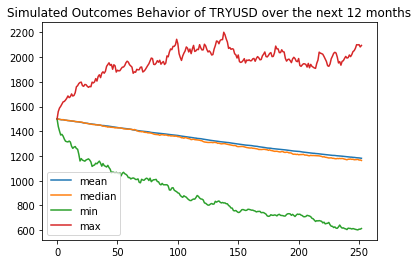

In [57]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2} over the next {number_of_months} months");

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = forex_2_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl_2)

count           1000.000000
mean               0.787569
std                0.156303
min                0.408332
25%                0.678011
50%                0.775868
75%                0.880798
max                1.396743
95% CI Lower       0.529200
95% CI Upper       1.134313
Name: 252, dtype: float64


In [59]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower_2 = round(tbl_2[8]*amount,2)
ci_upper_2 = round(tbl_2[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1500 will end within the range of  $793.8 and $1701.47, by the time of your projected vacation.


## Third Countries Currency - Monte Carlo

In [60]:
ticker_data_3 = pd.concat([forex_3], axis=1, keys=[f'{forex_pair_3}'])
number_of_months = number_of_months

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = 1000,
    num_trading_days = 21 * number_of_months
)

In [61]:
# Run Monte Carlo simulations to forecast projected returns
forex_3_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.991096  1.006191  0.999083  1.008773  0.978301  0.995696  1.006157   
2    0.987921  1.023548  0.990539  1.004205  0.972543  1.004971  1.002678   
3    0.991168  1.021603  1.010993  0.996150  0.983450  1.013186  0.990425   
4    0.975827  1.042909  1.021238  0.998765  0.953623  1.022220  0.980933   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.810498  0.813286  0.939630  0.858070  0.757993  0.867834  0.602164   
249  0.810170  0.824928  0.916039  0.877656  0.760894  0.868715  0.592815   
250  0.785459  0.838862  0.910803  0.876230  0.767199  0.859314  0.586632   
251  0.789879  0.829123  0.933251  0.877583  0.769838  0.868855  0.582721   
252  0.807498  0.842286  0.923074  0.873111  0.777438  0.874390  0.579816   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.996205  0.987428  1.011403  ...  0.997618  0.994487  0.990248   
2    0.980825  0.974696  1.021936  ...  0.986938  1.006954  0.978806   
3    0.974924  0.971739  1.032743  ...  0.970543  0.995387  0.981016   
4    0.970627  0.967611  1.010239  ...  0.977588  0.981198  0.988551   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.728580  0.822039  0.946238  ...  0.908938  0.769056  0.753081   
249  0.731975  0.828076  0.953112  ...  0.909124  0.765774  0.762780   
250  0.725150  0.826488  0.939273  ...  0.927353  0.777921  0.760102   
251  0.741291  0.823788  0.916781  ...  0.935745  0.776014  0.772884   
252  0.744835  0.823545  0.906064  ...  0.941104  0.776527  0.771708   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.993148  0.999650  1.023490  1.003864  0.977969  1.005632  1.022010  
2    0.998967  1.011773  1.025136  0.999502  0.965345  1.002436  1.019219  
3    0.983747  1.010194  1.006699  1.000975  0.979595  0.977557  1.028706  
4    1.012238  1.010398  1.020738  1.007855  0.968402  0.986090  1.039140  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.763744  0.879874  0.878051  0.656138  0.649293  1.029708  0.665734  
249  0.757331  0.889022  0.861794  0.654646  0.665860  1.043788  0.660313  
250  0.755737  0.878700  0.840934  0.647723  0.668594  1.044564  0.655631  
251  0.751658  0.882873  0.844244  0.648967  0.670987  1.035723  0.656268  
252  0.762098  0.871146  0.859662  0.645522  0.671757  1.030309  0.650267  

[253 rows x 1000 columns]

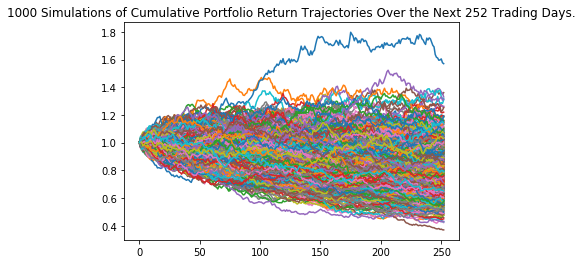

In [62]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot_3 = forex_3_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for the second countries currency

In [63]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)

# Display sample data
df_simulated_returns_3.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  0.999198  0.999113  0.959968  1.044903
2  0.998406  0.998097  0.943010  1.059135
3  0.997596  0.997741  0.931946  1.076752
4  0.996804  0.996733  0.927101  1.079936

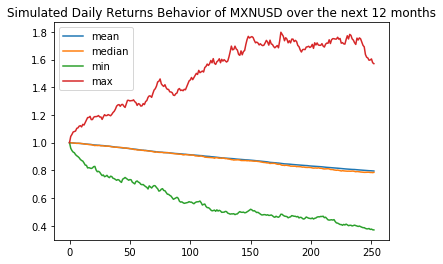

In [64]:
# Use the `plot` function to visually analyze the trajectory of third countries currency returns on a simulation
df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3} over the next {number_of_months} months");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [65]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl_3 = initial_investment * df_simulated_returns_3

# Display sample data
cumulative_pnl_3.head()

mean       median          min          max
0  1500.000000  1500.000000  1500.000000  1500.000000
1  1498.797048  1498.669033  1439.951818  1567.354369
2  1497.608663  1497.146219  1414.515314  1588.702594
3  1496.394268  1496.611503  1397.919086  1615.128055
4  1495.205278  1495.099404  1390.651825  1619.903512

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

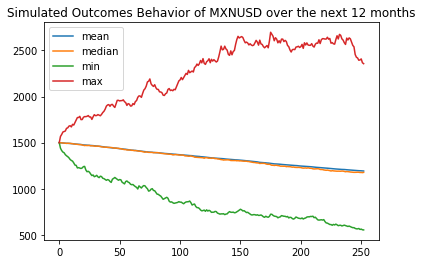

In [66]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3} over the next {number_of_months} months");

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3 = forex_3_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl_3)

count           1000.000000
mean               0.795159
std                0.158723
min                0.369661
25%                0.679641
50%                0.785222
75%                0.897877
max                1.570492
95% CI Lower       0.522620
95% CI Upper       1.134562
Name: 252, dtype: float64


In [68]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower_3 = round(tbl_3[8]*amount,2)
ci_upper_3 = round(tbl_3[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1500 will end within the range of  $783.93 and $1701.84, by the time of your projected vacation.


In [69]:
print(f"Comparing all 3 desired countries currencies,"
      f" there is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of: " "\n"
      f" ${ci_lower} and ${ci_upper} for {forex_pair}," "\n"
      f" ${ci_lower_2} and ${ci_upper_2} for {forex_pair_2}," "\n"
      f" ${ci_lower_3} and ${ci_upper_3} for {forex_pair_3}," "\n"
      f" by the time of your projected vacation.")

Comparing all 3 desired countries currencies, there is a 95% chance that your travel budget of $1500 will end within the range of: 
 $1379.37 and $1600.43 for CNYUSD,
 $793.8 and $1701.47 for TRYUSD,
 $783.93 and $1701.84 for MXNUSD,
 by the time of your projected vacation.


# Analyze Risk

## Beta

### Introduce US dollar as benchmark and clean data

In [70]:
# Import US Dollar Index
yahoo_financials = YahooFinancials('DX-Y.NYB')

# Read in US dollar index
read_us_dollar = YahooFinancials('DX-Y.NYB')

# Get US Dollars Historical Price data

# Dict of Dicts 
us_dollar = read_us_dollar.get_historical_price_data('2010-04-23', '2022-04-23', 'daily')

#Parse the data and isolate 'Prices' from the dictionary
us_dollar_price = us_dollar["DX-Y.NYB"]["prices"]

#Create df
us_dollar_df = pd.DataFrame(us_dollar_price)
US_DOLLAR_df = us_dollar_df 
us_dollar_df

date        high         low        open       close  volume  \
0     1271995200   82.099998   81.320000   82.019997   81.349998     0.0   
1     1272168000         NaN         NaN         NaN         NaN     NaN   
2     1272254400   81.709999   81.169998   81.470001   81.480003     0.0   
3     1272340800   82.440002   81.169998   81.180000   82.150002     0.0   
4     1272427200   82.709999   82.019997   82.290001   82.379997     0.0   
...          ...         ...         ...         ...         ...     ...   
3645  1650254400  100.860001  100.459999  100.500000  100.779999     0.0   
3646  1650340800  101.029999  100.699997  100.830002  100.959999     0.0   
3647  1650427200  101.040001  100.220001  100.980003  100.389999     0.0   
3648  1650513600  100.639999   99.820000  100.349998  100.580002     0.0   
3649  1650600000  101.330002  100.470001  100.620003  101.220001     0.0   

        adjclose formatted_date  
0      81.349998     2010-04-23  
1            NaN     2010-04-25  
2      81.480003     2010-04-26  
3      82.150002     2010-04-27  
4      82.379997     2010-04-28  
...          ...            ...  
3645  100.779999     2022-04-18  
3646  100.959999     2022-04-19  
3647  100.389999     2022-04-20  
3648  100.580002     2022-04-21  
3649  101.220001     2022-04-22  

[3650 rows x 8 columns]

In [71]:
# Set the date as the index to the DataFrame
us_dollar_df.set_index(pd.to_datetime(us_dollar_df['formatted_date'], infer_datetime_format=True), inplace=True)

# Drop un needed columns 
us_dollar_df.drop(columns=['date', 'open', 'high', 'low', 'volume', 'adjclose', 'formatted_date'], inplace=True)

# Rename column 
us_dollar_df.columns=['US Dollar Close']

# Count nulls
us_dollar_df.isnull().sum()

# Drop nulls
us_dollar_df = us_dollar_df.dropna()

us_dollar_df.head()

US Dollar Close
formatted_date                 
2010-04-23            81.349998
2010-04-26            81.480003
2010-04-27            82.150002
2010-04-28            82.379997
2010-04-29            82.000000

In [72]:
# Calculate Daily Returns


us_dollar_daily_returns = us_dollar_df.pct_change().dropna()
us_dollar_daily_returns.columns=['US Dollar Daily Returns']
us_dollar_daily_returns

US Dollar Daily Returns
formatted_date                         
2010-04-26                     0.001598
2010-04-27                     0.008223
2010-04-28                     0.002800
2010-04-29                    -0.004613
2010-04-30                    -0.001585
...                                 ...
2022-04-18                     0.004585
2022-04-19                     0.001786
2022-04-20                    -0.005646
2022-04-21                     0.001893
2022-04-22                     0.006363

[3020 rows x 1 columns]

### Calculate Daily Returns

In [73]:
# Calculate Daily Returns four country 1

forex_daily_returns = forex_close.pct_change().dropna()
forex_daily_returns.columns=[f'{forex_pair} Daily Returns']
forex_daily_returns

CNYUSD Daily Returns
2014-11-25              0.000614
2014-11-26             -0.000614
2014-11-27              0.000000
2014-11-28             -0.000614
2014-12-01             -0.001229
...                          ...
2022-04-22             -0.007742
2022-04-25             -0.009103
2022-04-26              0.000656
2022-04-27             -0.000656
2022-04-28             -0.009186

[1937 rows x 1 columns]

In [74]:
# Calculate Daily Returns four country 2

forex_2_daily_returns = forex_2_close.pct_change().dropna()
forex_2_daily_returns.columns=[f'{forex_pair_2} Daily Returns']
forex_2_daily_returns

TRYUSD Daily Returns
2014-11-25              0.004912
2014-11-26              0.003999
2014-11-27              0.001549
2014-11-28             -0.005966
2014-12-01              0.002890
...                          ...
2022-04-22             -0.001481
2022-04-25             -0.002967
2022-04-26             -0.001488
2022-04-27              0.000000
2022-04-28              0.001490

[1937 rows x 1 columns]

In [75]:
# Calculate Daily Returns four country 3

forex_3_daily_returns = forex_3_close.pct_change().dropna()
forex_3_daily_returns.columns=[f'{forex_pair_3} Daily Returns']
forex_3_daily_returns

MXNUSD Daily Returns
2014-11-25             -0.001366
2014-11-26             -0.004104
2014-11-27             -0.002747
2014-11-28             -0.012397
2014-12-01             -0.002789
...                          ...
2022-04-22             -0.002020
2022-04-25              0.000000
2022-04-26             -0.010121
2022-04-27              0.004090
2022-04-28             -0.006110

[1938 rows x 1 columns]

In [76]:
joined_forex_daily_returns = pd.concat([forex_daily_returns, forex_2_daily_returns, forex_3_daily_returns], axis='columns', join='inner')

joined_forex_daily_returns

CNYUSD Daily Returns  TRYUSD Daily Returns  MXNUSD Daily Returns
2014-11-25              0.000614              0.004912             -0.001366
2014-11-26             -0.000614              0.003999             -0.004104
2014-11-27              0.000000              0.001549             -0.002747
2014-11-28             -0.000614             -0.005966             -0.012397
2014-12-01             -0.001229              0.002890             -0.002789
...                          ...                   ...                   ...
2022-04-22             -0.007742             -0.001481             -0.002020
2022-04-25             -0.009103             -0.002967              0.000000
2022-04-26              0.000656             -0.001488             -0.010121
2022-04-27             -0.000656              0.000000              0.004090
2022-04-28             -0.009186              0.001490             -0.006110

[1937 rows x 3 columns]

In [77]:
# Concat Data and rename columns to reflect Daily returns

joined_data = pd.concat([joined_forex_daily_returns, us_dollar_daily_returns], axis='columns', join='inner')
joined_data

CNYUSD Daily Returns  TRYUSD Daily Returns  MXNUSD Daily Returns  \
2014-11-25              0.000614              0.004912             -0.001366   
2014-11-26             -0.000614              0.003999             -0.004104   
2014-11-28             -0.000614             -0.005966             -0.012397   
2014-12-01             -0.001229              0.002890             -0.002789   
2014-12-02              0.000615             -0.007757             -0.009790   
...                          ...                   ...                   ...   
2022-04-18             -0.000637             -0.001473              0.005988   
2022-04-19             -0.002551              0.000000             -0.009921   
2022-04-20             -0.004476             -0.001475              0.000000   
2022-04-21             -0.004496             -0.002954             -0.008016   
2022-04-22             -0.007742             -0.001481             -0.002020   

            US Dollar Daily Returns  
2014-11-25                -0.002609  
2014-11-26                -0.003526  
2014-11-28                 0.008561  
2014-12-01                -0.004640  
2014-12-02                 0.007959  
...                             ...  
2022-04-18                 0.004585  
2022-04-19                 0.001786  
2022-04-20                -0.005646  
2022-04-21                 0.001893  
2022-04-22                 0.006363  

[1863 rows x 4 columns]

# Performance Analysis

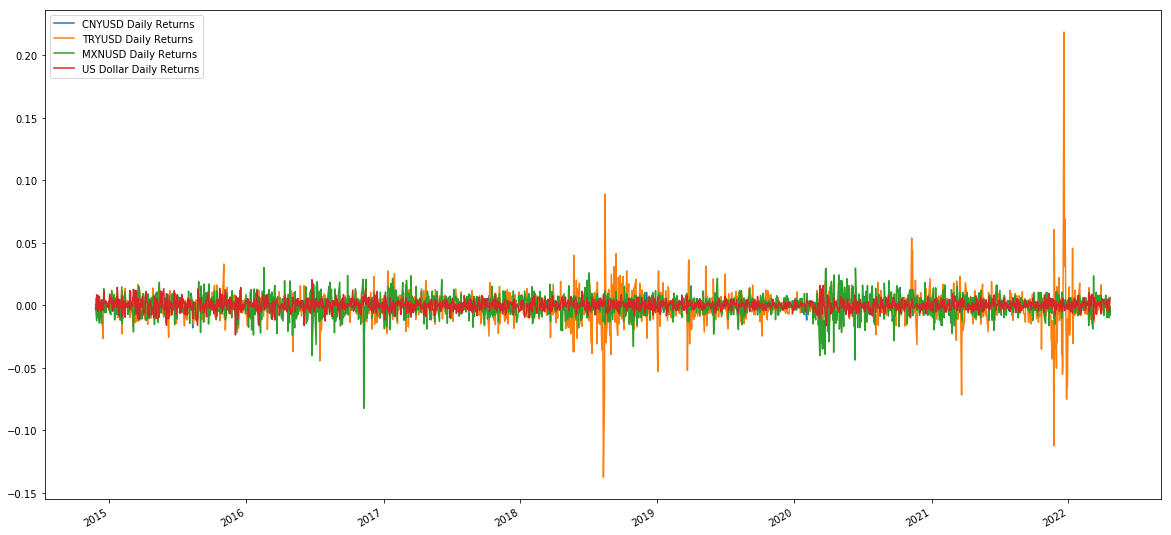

In [78]:
# Plot daily returns of all countries currencies
 
joined_data.plot(figsize=(20,10));

# fix up plot settings

# Calculate and plot cumulative returns

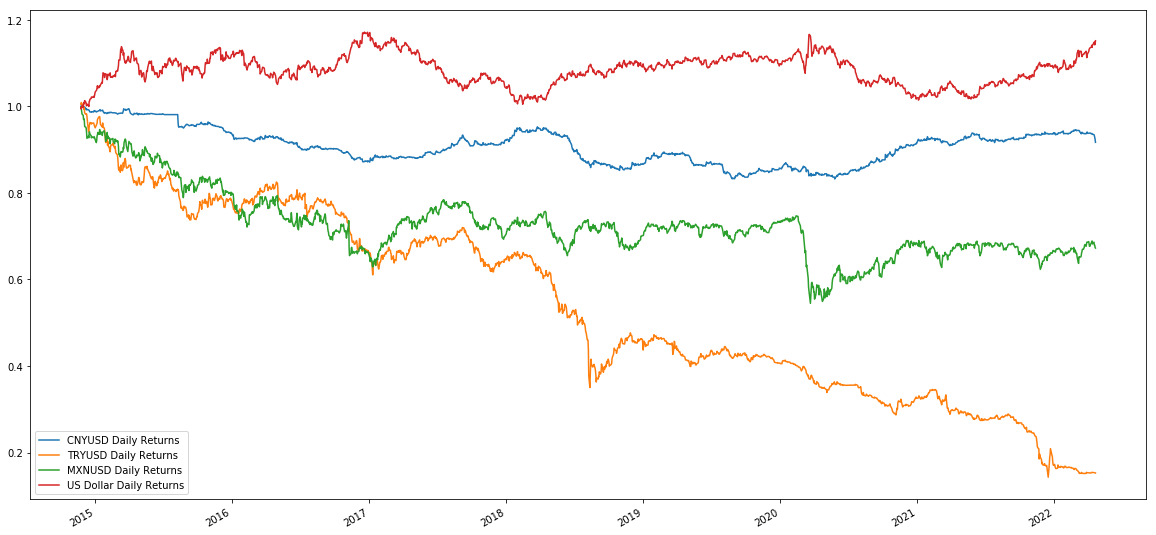

In [79]:
# Calculate cumulative returns of all countries currencies
cum_returns = (1+joined_data).cumprod()

# Plot cumulative returns
cum_returns.plot(figsize=(20,10));

### Create a box plot for each portfolio

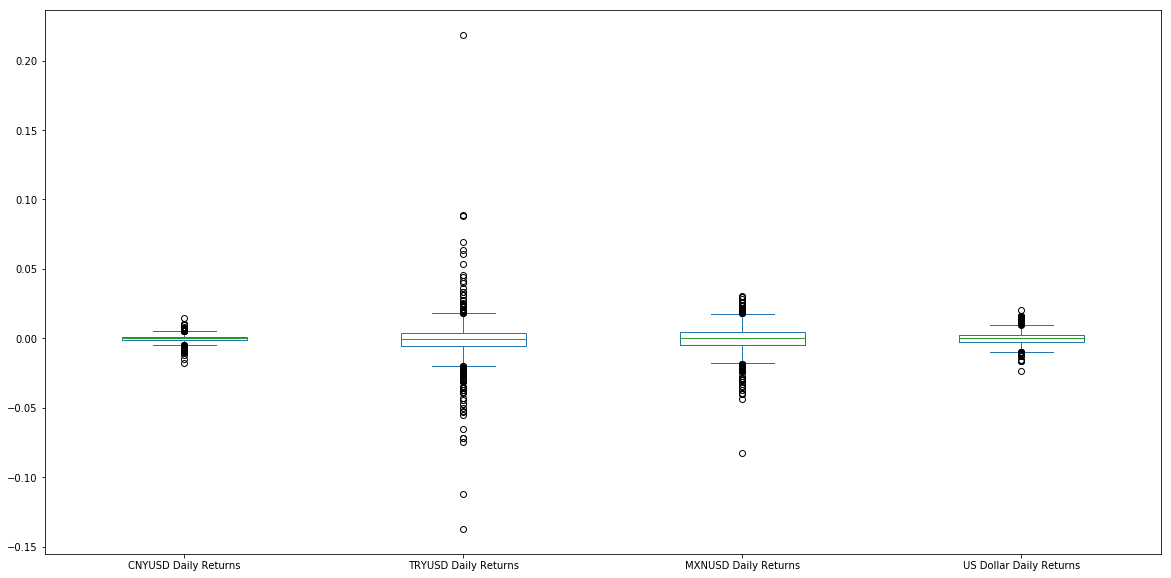

In [80]:
# Box plot to visually show risk

joined_data.plot.box(figsize=(20,10));

### Calculate Standard Deviations

In [81]:
# Calculate the daily standard deviations of all countreis currencies

joined_data_daily_returns_std = joined_data.std()
joined_data_daily_returns_std

CNYUSD Daily Returns       0.002323
TRYUSD Daily Returns       0.012750
MXNUSD Daily Returns       0.008585
US Dollar Daily Returns    0.004215
dtype: float64

### Determine which country currencies are riskier than the US Dollar Index

In [82]:
# Calculate  the daily standard deviation of US Dollar
isolated_dollar = joined_data['US Dollar Daily Returns'].std()

In [83]:
# Determine which countries currencies are riskier than the US Dollar
joined_data_daily_returns_std > isolated_dollar

CNYUSD Daily Returns       False
TRYUSD Daily Returns        True
MXNUSD Daily Returns        True
US Dollar Daily Returns    False
dtype: bool

### Calculate the Anualized Standard Deviation

In [84]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_data_daily_returns_std * np.sqrt(252)
annualized_std

CNYUSD Daily Returns       0.036873
TRYUSD Daily Returns       0.202403
MXNUSD Daily Returns       0.136278
US Dollar Daily Returns    0.066910
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all countries currencies using a 21-day window
2. Calculate the correlation between each countries currency to determine which currencies may mimick the US Dollar
3. Choose one currency, then calculate and plot the 60-day rolling beta between it and the US Dollar

### Calculate and plot rolling std for all portfolios with 21-day window

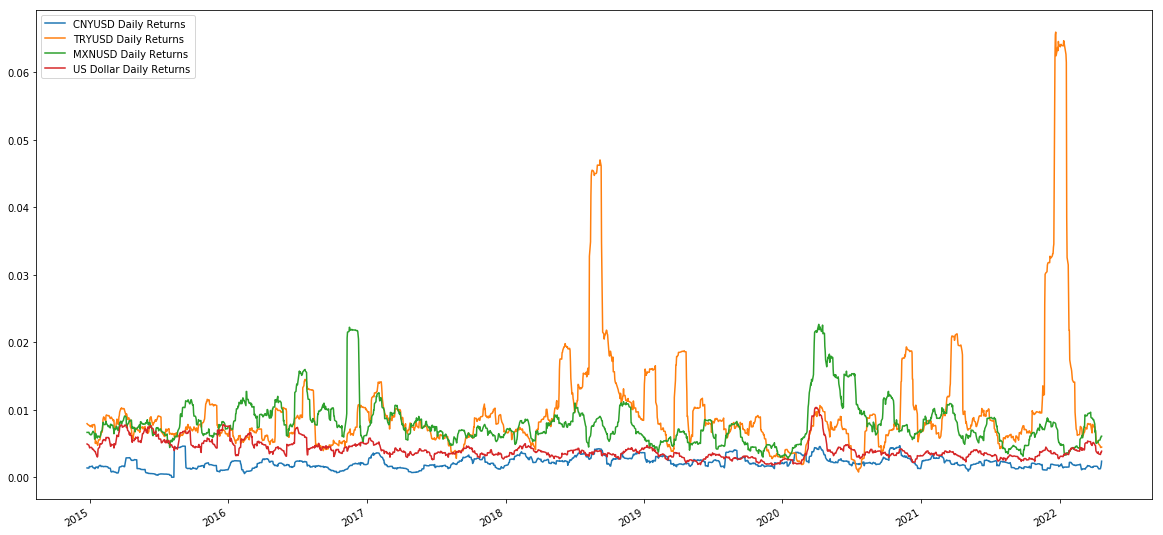

In [85]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_forex_21_day_std = joined_data.rolling(window = 21).std()

# Plot the rolling standard deviation
joined_forex_21_day_std.plot(figsize=(20, 10));

### Calculate and plot the correlation

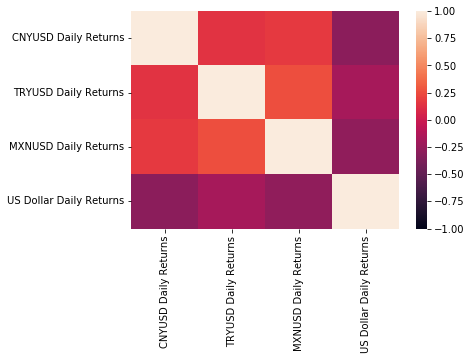

In [86]:
# Calculate the correlation
correlation = joined_data.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1);

### Calculate and Plot Beta for a chosen countreis currency and the US Dollar

In [87]:
# Chosen Country 1

# Calculate covariance of a single country currency
covariance = (joined_data[f'{forex_pair} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance

# Calculate variance of S&P 500
variance = joined_data['US Dollar Daily Returns'].var()
variance

# Computing beta
beta = covariance / variance
beta

-0.16363421502480233

In [88]:
# Chosen Country 2

# Calculate covariance of a single country currency
covariance_2 = (joined_data[f'{forex_pair_2} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance_2

# Calculate variance of S&P 500
variance_2 = joined_data['US Dollar Daily Returns'].var()
variance_2

# Computing beta
beta_2 = covariance_2 / variance_2
beta_2

-0.5242244735221151

In [89]:
# Chosen Country 3

# Calculate covariance of a single country currency
covariance_3 = (joined_data[f'{forex_pair_3} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance_3

# Calculate variance of S&P 500
variance_3 = joined_data['US Dollar Daily Returns'].var()
variance_3

# Computing beta
beta_3 = covariance_3 / variance_3
beta_3

-0.5578407328530224

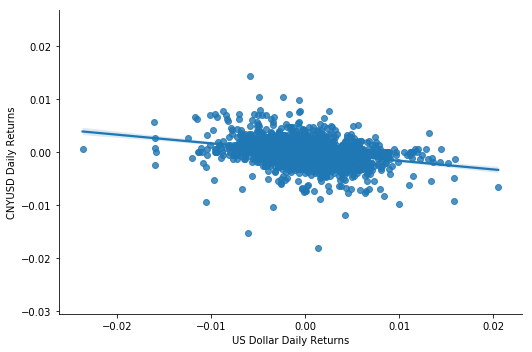

In [90]:
# Plot beta trend for country 1

sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True);

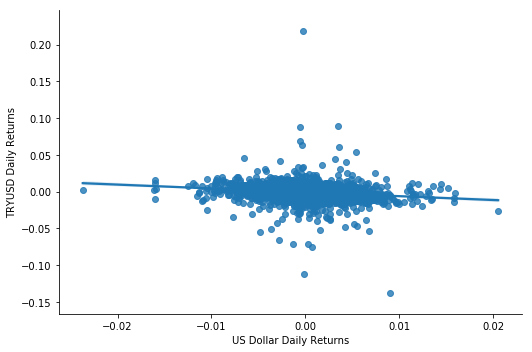

In [91]:
# Plot beta trend for country 2

sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair_2} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True);

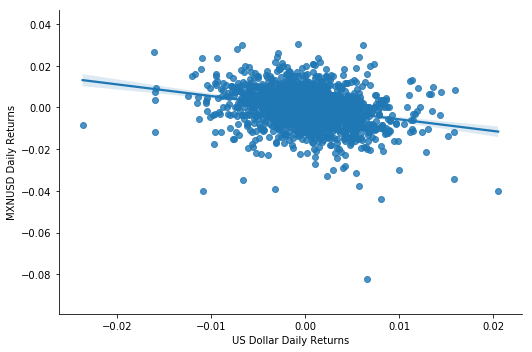

In [92]:
# Plot beta trend for country 3

sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair_3} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True);

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [93]:
# Calculate Annualized Sharpe Ratios
combined_data_sharpe_ratios = (joined_data.mean() * 252) / (joined_data_daily_returns_std * np.sqrt(252))
combined_data_sharpe_ratios


CNYUSD Daily Returns      -0.299407
TRYUSD Daily Returns      -1.154887
MXNUSD Daily Returns      -0.325137
US Dollar Daily Returns    0.319062
dtype: float64

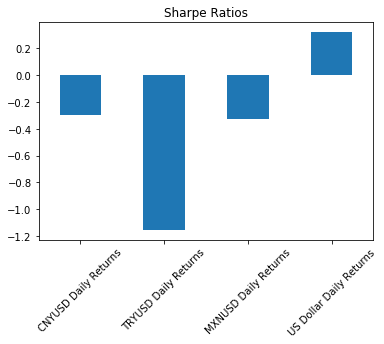

In [94]:
# Visualize the sharpe ratios as a bar plot
combined_data_sharpe_ratios.plot(kind="bar", title= "Sharpe Ratios", rot=45);

# Fix up plot, x axis re size etc..

### Log Returns

In [95]:
# us_dollar_close = us_dollar_df.rename_axis(index=None)

# joined_close = pd.concat([us_dollar_close, joined_forex])
# joined_close

In [96]:
log_returns = np.log(joined_forex/joined_forex.shift(1)).dropna()
log_returns

daily_std = log_returns.std()

annualized_std = daily_std * np.sqrt(252)

### Volatility

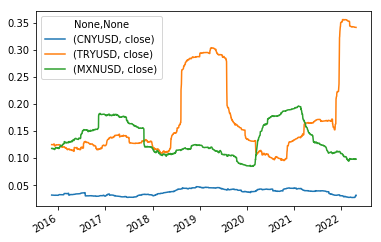

In [98]:
TRADING_DAYS = number_of_months * 21
volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.plot();

### Sortino Ratio

The Sortino ratio is very similar to the Sharpe ratio, the only difference being that where the Sharpe ratio uses all the observations for calculating the standard deviation the Sortino ratio only considers the harmful variance

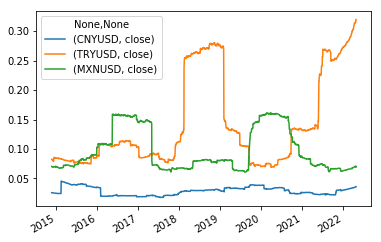

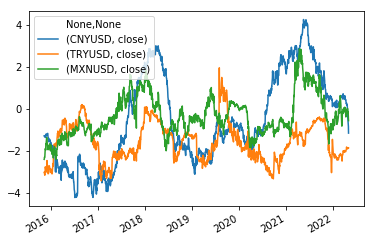

In [99]:
Rf = 0.01/252 #risk-free rate (daily)
sortino_vol = log_returns[log_returns<0].rolling(window=TRADING_DAYS, center=True, min_periods=10).std()*np.sqrt(TRADING_DAYS)
sortino_ratio = (log_returns.rolling(window=TRADING_DAYS).mean() - Rf)*TRADING_DAYS / sortino_vol

sortino_vol.plot();
sortino_ratio.plot();

### Max Drawdown

Max drawdown quantifies the steepest decline from peak to trough observed for an investment. This is useful for a number of reasons, mainly the fact that it doesn't rely on the underlying returns being normally distributed.


In [100]:
def max_drawdown(returns):
    cumulative_returns = (returns+1).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns/peak)-1
    return drawdown.min()


returns = joined_forex.pct_change()
max_drawdowns = returns.apply(max_drawdown, axis=0)
max_drawdowns*100

CNYUSD  close   -14.592275
TRYUSD  close   -86.654883
MXNUSD  close   -46.238030
dtype: float64

### Calmar Ratio

Calmar ratio uses max drawdown in the denominator as opposed to standard deviation.


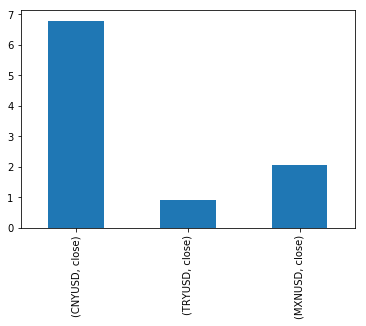

In [101]:
calmars = np.exp(log_returns.mean()*252)/abs(max_drawdowns)
calmars.plot.bar();

### What Countries Currency is the riskiest? 

# Build Map 

In [102]:
# Set Path and Read in csv data.

csvpath = Path("all_countries.csv")
country_list_df = pd.read_csv(csvpath)
#country_list_df

In [103]:
# Initialize lists to be turned into columns of dataframe
capital_city = []
lat_long = []
currency = []
subregion = []
wiki = []
lat = []
long = []

for country in country_list_df['Country']:
    country_data = CountryInfo(country)
    capital_city.append(country_data.capital())
    lat.append(country_data.capital_latlng()[0])
    long.append(country_data.capital_latlng()[1])
    currency.append(country_data.currencies())
    subregion.append(country_data.subregion())
    wiki.append(country_data.wiki()) 
    
# Build Dataframe

country_list_df['Capital City'] = capital_city
country_list_df['Latitude'] = lat
country_list_df['Longitude'] = long
country_list_df['Currency'] = currency
country_list_df['Sub-Region'] = subregion
country_list_df['wiki'] = wiki
country_list_df

Country Population\r\n(2020) Land Area\r\n (Km²)  \
0            Afghanistan           38,928,346             652,860   
1                Albania            2,877,797              27,400   
2                Algeria           43,851,044           2,381,740   
3                 Angola           32,866,272           1,246,700   
4    Antigua and Barbuda               97,929                 440   
..                   ...                  ...                 ...   
174            Venezuela           28,435,940             882,050   
175              Vietnam           97,338,579             310,070   
176                Yemen           29,825,964             527,970   
177               Zambia           18,383,955             743,390   
178             Zimbabwe           14,862,924             386,850   

    Density\r\n(P/Km²)  Capital City   Latitude   Longitude Currency  \
0                   60         Kabul  34.526011   69.177684    [AFN]   
1                  105        Tirana  41.326873   19.818791    [ALL]   
2                   18       Algiers  36.775361    3.060188    [DZD]   
3                   26        Luanda  -8.827270   13.243951    [AOA]   
4                  223  Saint John's  47.561701  -52.715149    [XCD]   
..                 ...           ...        ...         ...      ...   
174                 32       Caracas  10.506098  -66.914602    [VEF]   
175                314         Hanoi  21.029450  105.854444    [VND]   
176                 56        Sana'a  15.353857   44.205884    [YER]   
177                 25        Lusaka -15.416449   28.282154    [ZMK]   
178                 38        Harare -17.831773   31.045686    [USD]   

             Sub-Region                                              wiki  
0         Southern Asia          http://en.wikipedia.org/wiki/afghanistan  
1       Southern Europe              http://en.wikipedia.org/wiki/albania  
2       Northern Africa              http://en.wikipedia.org/wiki/algeria  
3         Middle Africa               http://en.wikipedia.org/wiki/angola  
4             Caribbean  http://en.wikipedia.org/wiki/antigua_and_barbuda  
..                  ...                                               ...  
174       South America            http://en.wikipedia.org/wiki/venezuela  
175  South-Eastern Asia              http://en.wikipedia.org/wiki/vietnam  
176        Western Asia                http://en.wikipedia.org/wiki/yemen  
177      Eastern Africa               http://en.wikipedia.org/wiki/zambia  
178      Eastern Africa             http://en.wikipedia.org/wiki/zimbabwe  

[179 rows x 10 columns]

### Plot the populated map

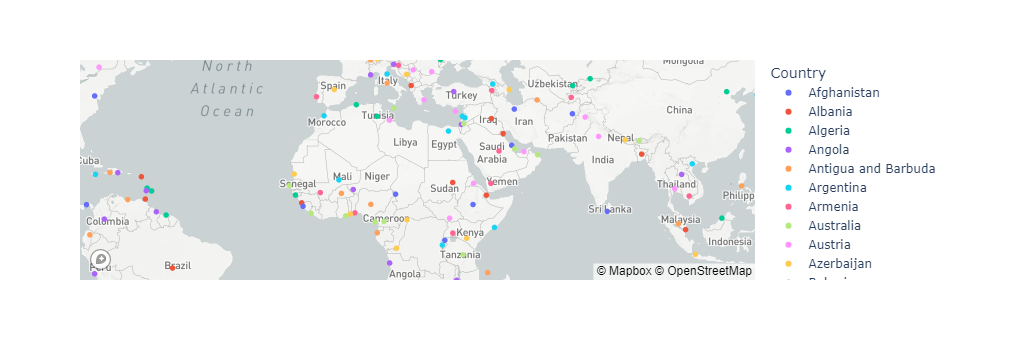

In [104]:
# Slice and plot data by name
map_1 = px.scatter_mapbox(
    country_list_df,
    lat='Latitude',
    lon='Longitude',
    color="Country",
    zoom=1.2
)
map_1.show()